<a href="https://colab.research.google.com/github/meerabshabeeh04/Personalized-Exercise-Plan-Recommender/blob/main/Personalized_Exercise_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Necessary Libraries**

In [1]:
!pip install skimpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


**Importing All Necessary Libraries**

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import skimpy


**Loading Dataset**

In [4]:
#Load dataset
dataset = pd.read_csv('/content/final_dataset_BFP .csv')

# Handle missing values
dataset.fillna(method='ffill', inplace=True)

**Exploratory Data Analysis for Exercise Recommendations**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Body Fat Percentage           5000 non-null   float64
 4   BFPcase                       5000 non-null   object 
 5   Gender                        5000 non-null   object 
 6   Age                           5000 non-null   int64  
 7   BMIcase                       5000 non-null   object 
 8   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 351.7+ KB
None
(5000, 9)
            Weight       Height          BMI  Body Fat Percentage  \
count  5000.000000  5000.000000  5000.000000          5000.000000   
mean     80.218232     1.762

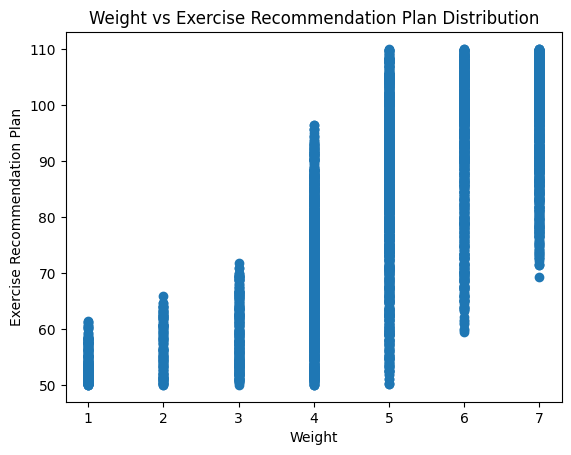

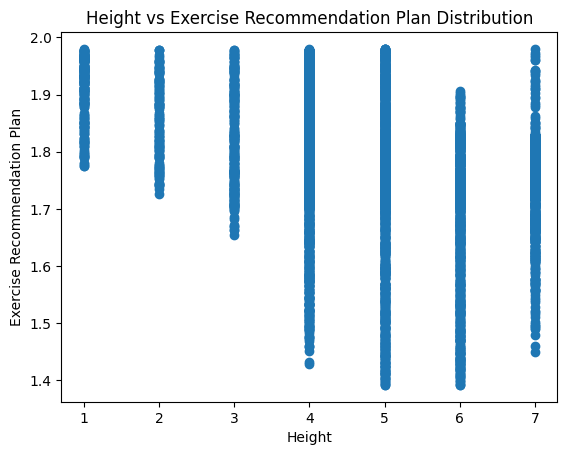

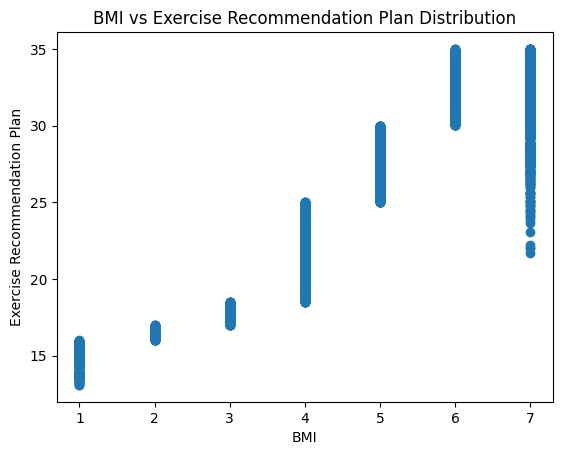

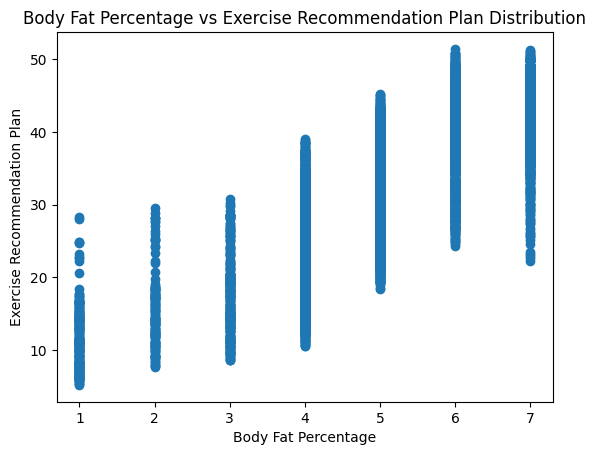

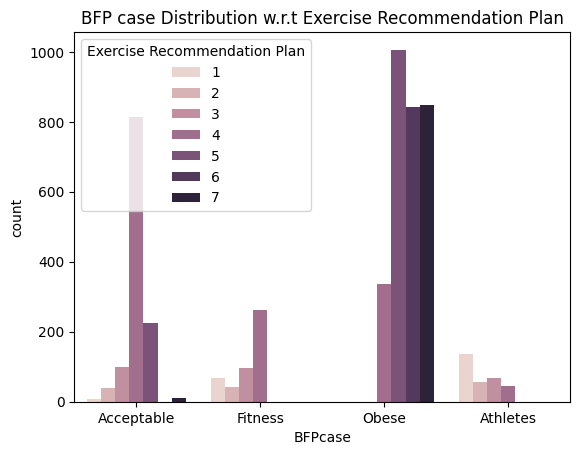

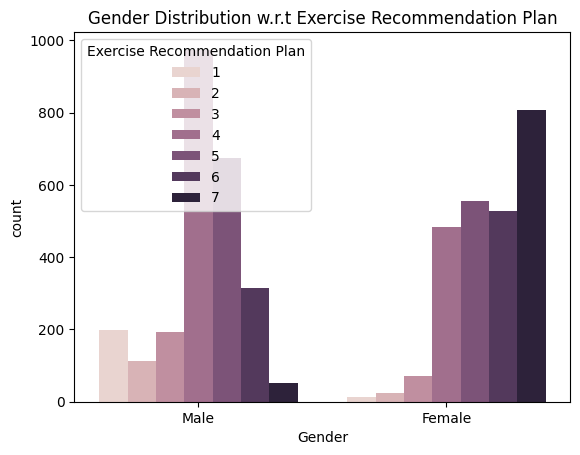

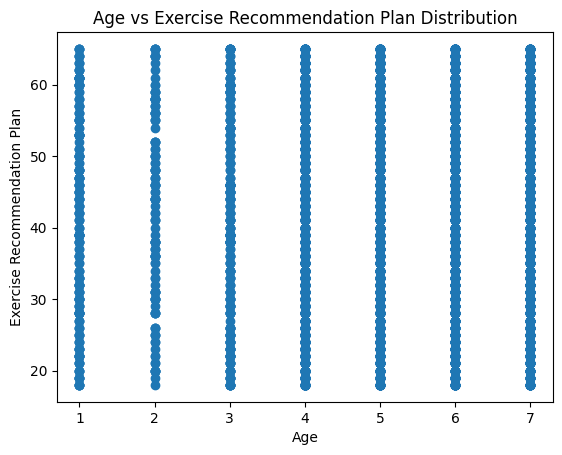

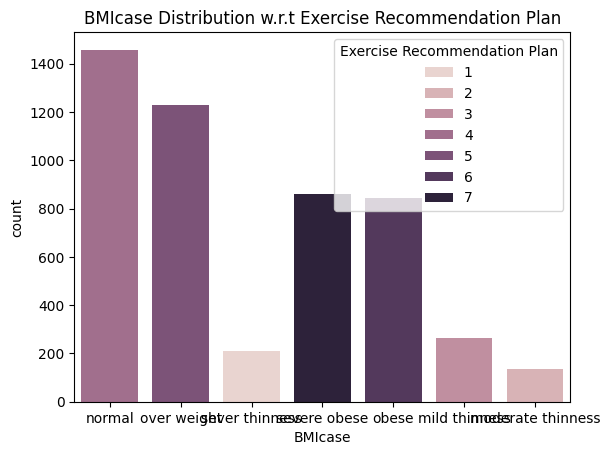

['Acceptable' 'Fitness' 'Obese' 'Athletes']
['Male' 'Female']
['normal' 'over weight' 'sever thinness' 'severe obese' 'obese'
 'mild thinness' 'moderate thinness']


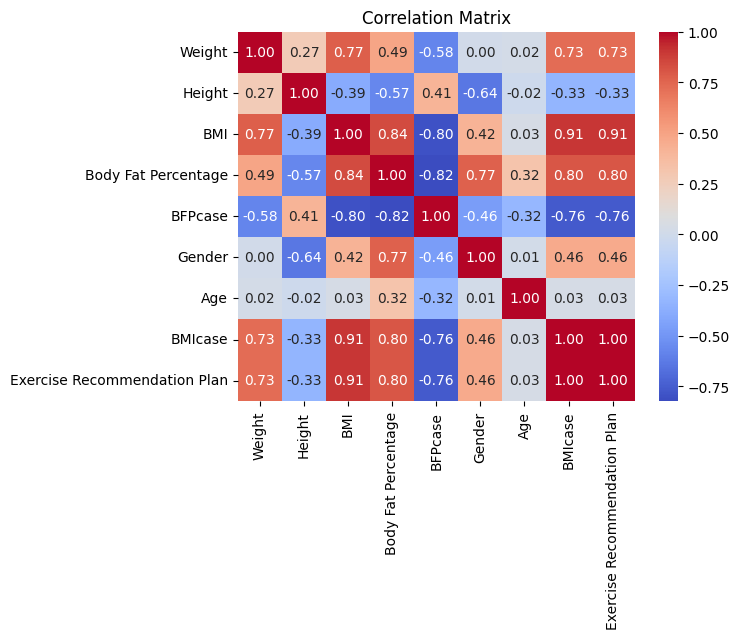

Exercise Recommendation Plan
4    1458
5    1230
7     860
6     843
3     263
1     211
2     135
Name: count, dtype: int64


In [ ]:
#EDA Analysis
import matplotlib.pyplot as plt
import seaborn as sns
print(dataset.info())
print(dataset.shape)
print(dataset.describe())
print(dataset.nunique())
plt.scatter(dataset['Exercise Recommendation Plan'], dataset['Weight'])
plt.xlabel('Weight')
plt.ylabel('Exercise Recommendation Plan')
plt.title('Weight vs Exercise Recommendation Plan Distribution')
plt.show()
plt.scatter(dataset['Exercise Recommendation Plan'], dataset['Height'])
plt.xlabel('Height')
plt.ylabel('Exercise Recommendation Plan')
plt.title('Height vs Exercise Recommendation Plan Distribution')
plt.show()
plt.scatter(dataset['Exercise Recommendation Plan'], dataset['BMI'])
plt.xlabel('BMI')
plt.ylabel('Exercise Recommendation Plan')
plt.title('BMI vs Exercise Recommendation Plan Distribution')
plt.show()
plt.scatter(dataset['Exercise Recommendation Plan'], dataset['Body Fat Percentage'])
plt.xlabel('Body Fat Percentage')
plt.ylabel('Exercise Recommendation Plan')
plt.title('Body Fat Percentage vs Exercise Recommendation Plan Distribution')
plt.show()
sns.countplot(x='BFPcase', data=dataset, hue='Exercise Recommendation Plan')
plt.title('BFP case Distribution w.r.t Exercise Recommendation Plan')
plt.show()
sns.countplot(x='Gender', data=dataset, hue='Exercise Recommendation Plan')
plt.title('Gender Distribution w.r.t Exercise Recommendation Plan')
plt.show()
plt.scatter(dataset['Exercise Recommendation Plan'], dataset['Age'])
plt.xlabel('Age')
plt.ylabel('Exercise Recommendation Plan')
plt.title('Age vs Exercise Recommendation Plan Distribution')
plt.show()
sns.countplot(x='BMIcase', data=dataset, hue='Exercise Recommendation Plan')
plt.title('BMIcase Distribution w.r.t Exercise Recommendation Plan')
plt.show()
print(dataset['BFPcase'].unique())
print(dataset['Gender'].unique())
print(dataset['BMIcase'].unique())
dataset['BFPcase'] = dataset['BFPcase'].map({'Obese':1, 'Acceptable':2, 'Fitness':3, 'Athletes':4})
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})
dataset['BMIcase'] = dataset['BMIcase'].map({'sever thinness':1, 'moderate thinness':2, 'mild thinness':3, 'normal':4, 'over weight':5, 'obese':6, 'severe obese':7})
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print(dataset['Exercise Recommendation Plan'].value_counts())

**Summary Of All Columns**


In [ ]:
summary = skimpy.skim(dataset)

print(summary)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5000   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Weight                 │   0 │     0 │   80.22 │   17.16 │     50 │ 65.69 │ 80.18 │ 94.96 │   110 │ ▇▇▇▇▇▇ │  │
│ │ Height                 │   0 │     0 │   1.763 │  0.1286 │  1.392 │ 1.704 │ 1.775 │ 1.846 │  1.98 │ ▁▂▃▇▇▅ │  │
│ │ BMI                    │   0 │     0 │      26 │   5.601 │   13.1 │ 21.58 │ 26.57 │  30.8 │    35 │ ▂▅▆▇▇▇ │  │
│ │ Body Fat Percentage    │   0 │     0 │   29.97 │    10.8 │   5.18 │  21.3 │ 29.98 │ 39.13 │ 51.43 │ ▂▆▇▇▇▃ │  │
│ │ BFPcase                │   0 │     0 │   1.608 │  0.8884 │      1 │     1 │     1 │     2 │     4 │ ▇ ▃ ▁▁ │  │
│ │ Gender                 │   0 │     0 │  0.4966 │     0.5 │      0 │     0 │     0 │     1 │     1 │ ▇    ▇ │  │
│ │ Age                    │   0 │     0 │   41.77 │    13.8 │     18 │    30 │    42 │    54 │    65 │ ▇▇▇▇▇▇ │  │
│ │ BMIcase                │   0 │     0 │   4.866 │   1.503 │      1 │     4 │     5 │     6 │     7 │ ▁▁▁▇▆▇ │  │
│ │ Exercise               │   0 │     0 │   4.866 │   1.503 │      1 │     4 │     5 │     6 │     7 │ ▁▁▁▇▆▇ │  │
│ │ Recommendation Plan    │     │       │         │         │        │       │       │       │       │        │  │
│ └────────────────────────┴─────┴───────┴─────────┴─────────┴────────┴───────┴───────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

None


**Have a Look at Dataset**

In [ ]:
dataset

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,2,0,29,4,4
1,77.721154,1.945498,20.534184,13.731021,3,0,23,4,4
2,87.558726,1.742754,28.828859,42.304631,1,1,57,5,5
3,89.473356,1.758318,28.940017,27.958021,1,0,41,5,5
4,69.963943,1.722570,23.578732,16.464478,3,0,19,4,4
...,...,...,...,...,...,...,...,...,...
4995,87.003054,1.902891,24.027404,16.772884,3,0,18,4,4
4996,92.121555,1.779346,29.096464,30.215757,1,0,50,5,5
4997,105.298845,1.972883,27.053345,31.214014,1,0,65,5,5
4998,90.411999,1.803409,27.799528,29.579434,1,0,54,5,5


**All columns of Dataset**


In [ ]:
print(dataset.columns)

Index(['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'BFPcase', 'Gender',
       'Age', 'BMIcase', 'Exercise Recommendation Plan'],
      dtype='object')


**Droping Target Variable From Dataset**

In [ ]:
X = dataset.drop('Exercise Recommendation Plan', axis=1)
y = dataset['Exercise Recommendation Plan']

In [ ]:
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_encoded.columns.tolist(), 'feature_names.pkl')

['feature_names.pkl']

***Data  Preprocessing and Feature Engineering ***

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Convert BMIcase and BFPcase categories to integers
dataset['BMIcase'] = dataset['BMIcase'].astype('category').cat.codes
dataset['BFPcase'] = dataset['BFPcase'].astype('category').cat.codes

# Split the dataset into features and target variable
X = dataset.drop('Exercise Recommendation Plan', axis=1)
y = dataset['Exercise Recommendation Plan']

# Encode categorical variables (Gender)
encoder = OneHotEncoder(sparse_output=False)
encoded_gender = encoder.fit_transform(dataset[['Gender']])

# One-hot encode BMIcase column
encoded_bmicase = pd.get_dummies(dataset['BMIcase'], prefix='BMIcase')

# One-hot encode BFPcase column
encoded_bfp = pd.get_dummies(dataset['BFPcase'], prefix='BFPcase')

# Scale numerical features (Weight, Height, BMI, Body Fat Percentage, Age)
scaler = StandardScaler()
numerical_features = ['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'Age']
scaled_features = scaler.fit_transform(X[numerical_features])

# Create DataFrame for scaled numerical features
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Convert encoded arrays to DataFrames
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['Gender']))
encoded_bmicase_df = pd.DataFrame(encoded_bmicase)
encoded_bfp_df = pd.DataFrame(encoded_bfp)

# Concatenate all features
X_encoded = pd.concat([scaled_features_df.reset_index(drop=True), encoded_gender_df, encoded_bmicase_df, encoded_bfp_df], axis=1)

# Output the number of input features
num_input_features = X_encoded.shape[1]
print("Number of input features:", num_input_features)

# Features and labels
features = X_encoded
labels = y


Number of input features: 18


In [ ]:
num_input_features = X.shape[1]
print("Number of input features:", num_input_features)

Number of input features: 8


**Data Preprocessing for Machine Learning Model**

In [ ]:
# Extract numerical features (excluding the encoded ones)
numerical_features = X.drop(columns=['Gender', 'BFPcase'])

# Normalize numerical features
normalized_numerical_features = scaler.fit_transform(numerical_features)

# Create DataFrame for normalized numerical features
normalized_numerical_features_df = pd.DataFrame(normalized_numerical_features, columns=numerical_features.columns)

# Convert encoded arrays to DataFrames
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['Gender']))
encoded_bmicase_df = pd.DataFrame(encoded_bmicase)

# Concatenate the normalized numerical features with the encoded features
X_encoded = pd.concat([normalized_numerical_features_df.reset_index(drop=True), encoded_gender_df, encoded_bmicase_df], axis=1)

# Output the number of input features
num_input_features = X_encoded.shape[1]
print("Number of input features:", num_input_features)

Number of input features: 15


**Looking Dataset After Preprocessing**

In [ ]:
dataset

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,1,0,29,3,4
1,77.721154,1.945498,20.534184,13.731021,2,0,23,3,4
2,87.558726,1.742754,28.828859,42.304631,0,1,57,4,5
3,89.473356,1.758318,28.940017,27.958021,0,0,41,4,5
4,69.963943,1.722570,23.578732,16.464478,2,0,19,3,4
...,...,...,...,...,...,...,...,...,...
4995,87.003054,1.902891,24.027404,16.772884,2,0,18,3,4
4996,92.121555,1.779346,29.096464,30.215757,0,0,50,4,5
4997,105.298845,1.972883,27.053345,31.214014,0,0,65,4,5
4998,90.411999,1.803409,27.799528,29.579434,0,0,54,4,5


**Normalizing Numerical Features**


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize numerical features (Weight, BMI, Height, Age, Body Fat Percentage)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[['Weight', 'BMI', 'Height', 'Age', 'Body Fat Percentage']])

# Combine features into a single DataFrame
features = pd.concat([encoded_gender_df, pd.DataFrame(scaled_features), encoded_bmicase_df, encoded_bfp_df], axis=1)
labels = dataset['Exercise Recommendation Plan']


**Splitting Dataset into Training and Testing**

In [ ]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

**SLECTING BEST PARAMETER FOR TUNING**

In [ ]:


# Hyperparameter tuning for KNN using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found for KNN:")
print(grid_search.best_params_)


Best parameters found for KNN:
{'n_neighbors': 3}


**ALGORITHM KNN CLASSIFIER**

In [ ]:
# Train the best KNN model
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Predict on the test set using the best KNN model
y_pred_knn = best_knn.predict(X_test)

# Evaluate the best KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Model Accuracy: {accuracy_knn}')
print(classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00       309
           5       1.00      1.00      1.00       237
           6       1.00      1.00      1.00       161
           7       1.00      1.00      1.00       159

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
# Save the encoder and scaler
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

**TRAINING FOR RANDOM FOREST MODEL**

In [ ]:
# Train a Random Forest model for comparison
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set using the Random Forest model
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00       309
           5       1.00      1.00      1.00       237
           6       1.00      1.00      1.00       161
           7       1.00      1.00      1.00       159

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**SAVING BOTH MODELS**

In [ ]:

# Save the best KNN model
joblib.dump(best_knn, 'best_knn_model.pkl')

# Save the Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

**PREPROCESSING AND TESTING THE MODEL WITH SAMPLE INPUT FOR CHECKING ACCURACY**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

# Updated data dictionary with 'BFP' and 'BFPcase' included
data = {
    'Gender': ['Female', 'Male', 'Female'],
    'Weight': [70.0, 80.0, 65.0],
    'BMI': [25.0, 30.0, 22.0],
    'Height': [1.65, 1.75, 1.60],
    'Age': [30, 35, 25],
    'BMIcase': [1, 2, 1],
    'BFP': [28.0, 25.0, 30.0],  # Adding 'BFP' (Body Fat Percentage) to the data
    'BFPcase': [1, 2, 1],       # Adding 'BFPcase' to the data
}

df = pd.DataFrame(data)

# Updated sample input with 'BFP' and 'BFPcase' included
sample_input = {
    'Gender': 'Female',
    'Weight': 70.0,   # Additional feature - Weight
    'BMI': 25.0,      # Additional feature - BMI
    'Height': 1.65,   # Additional feature - Height
    'Age': 30,        # Additional feature - Age
    'BMIcase': 1,
    'BFP': 28.0,      # Additional feature - BFP (Body Fat Percentage)
    'BFPcase': 1,     # Included the 'BFPcase' feature with value 1
}

# Create a DataFrame from the sample input
sample_df = pd.DataFrame([sample_input])

# Ensure 'BFP' and 'BFPcase' are included in the dataframe before continuing with the data processing pipeline
# Encode categorical variables (Gender)
encoder = OneHotEncoder(sparse=False)
encoder.fit(df[['Gender']])
encoded_gender_sample = encoder.transform(sample_df[['Gender']])

# One-hot encode BMIcase, BFPcase columns
encoded_bmicase = pd.get_dummies(df['BMIcase'])
encoded_bmicase_columns = encoded_bmicase.columns
encoded_bmicase_sample = pd.get_dummies(sample_df['BMIcase']).reindex(columns=encoded_bmicase_columns, fill_value=0)

encoded_bfpcase = pd.get_dummies(df['BFPcase'])
encoded_bfpcase_columns = encoded_bfpcase.columns
encoded_bfpcase_sample = pd.get_dummies(sample_df['BFPcase']).reindex(columns=encoded_bfpcase_columns, fill_value=0)

# Continue with the rest of your code

sample_df

"""**SCALING THE NUMERICAL COLUMNS  AND PRINTING ALL FEATURES OF SAMPLE INPUT**"""

from sklearn.preprocessing import StandardScaler

# Define numerical columns based on your dataset (Weight, BMI, Height, Age, BFP)
numerical_columns = ['Weight', 'BMI', 'Height', 'Age', 'BFP']

# Encode categorical variables (gender and BMI case) before using them
# Assuming you are using one-hot encoding or label encoding for encoding
encoded_gender_columns = ['Male', 'Female']
encoded_bmicase_columns = ['Normal', 'Overweight', 'Obese']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
sample_df

,Gender,Weight,BMI,Height,Age,BMIcase,BFP,BFPcase
0,Female,70.0,25.0,1.65,30,1,28.0,1


**SCALING THE NUMERICAL COLUMNS AND PRINTING ALL FEATURES OF SAMPLE INPUT**

In [ ]:
# Normalize numerical features (Weight, BMI, Height, Age, BFP)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_columns])
scaled_features_sample = scaler.transform(sample_df[numerical_columns])

# Combine features into a single DataFrame
features_sample = pd.concat([pd.DataFrame(encoded_gender_sample), pd.DataFrame(scaled_features_sample), encoded_bmicase_sample], axis=1)

# Ensure columns match the training set
features_sample_columns = encoded_gender_columns + numerical_columns + encoded_bmicase_columns
#features_sample.columns = features_sample_columns

# Print the features for the sample input
print(features_sample)

     0    1         0         1         2    3         4     1  2
0  1.0  0.0 -0.267261 -0.202031 -0.267261  0.0  0.162221  True  0


**LOADING THE BEST KNN MODEL**

In [ ]:
# Load the best KNN model
best_knn = joblib.load('best_knn_model.pkl')

**MAKING PREDICTION OF EXCERCISE PLAN FROM THE SAMPLE INPUTS**

In [ ]:
# Making prediction
prediction = best_knn.predict(features_sample)
print(f'Predicted Exercise Recommendation Plan: {prediction[0]}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but KNeighborsClassifier is expecting 18 features as input.

**Linear Regression**

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = pd.read_csv('/content/final_dataset_BFP .csv')
dataset['BFPcase'] = dataset['BFPcase'].map({'Obese':1, 'Acceptable':2, 'Fitness':3, 'Athletes':4})
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})
dataset['BMIcase'] = dataset['BMIcase'].map({'sever thinness':1, 'moderate thinness':2, 'mild thinness':3, 'normal':4, 'over weight':5, 'obese':6, 'severe obese':7})
explanatory_vars = dataset.drop("Exercise Recommendation Plan",axis=1)
target = dataset["Exercise Recommendation Plan"]
X_train,X_test,Y_train,Y_test =train_test_split(explanatory_vars, target, random_state=0)
#K-Nearest Neighbors Regression
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, Y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, Y_test)))
print("Train set R^2: {:.2f}".format(reg.score(X_train, Y_train)))
#Linear Regression
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test =train_test_split(explanatory_vars, target, random_state=42)
lr = LinearRegression().fit(X_train, Y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Train set R^2: {:.2f}".format(lr.score(X_train, Y_train)))
print("Test set R^2: {:.2f}".format(lr.score(X_test, Y_test)))
#Linear Regression without python package
import numpy as np

def linear_regression(X, y):
    X = np.column_stack((np.ones(len(X)), X))
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

def predict(X, theta):
    X = np.column_stack((np.ones(len(X)), X))
    y_pred = X.dot(theta)
    return y_pred

def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse
theta = linear_regression(X_train, Y_train)
y_pred = predict(X_test, theta)
mse = mean_squared_error(Y_test, y_pred)
print("Model coefficients (theta):", theta.flatten())
print("Mean Squared Error:", mse)

Test set R^2: 0.92
Train set R^2: 0.96
lr.coef_: [-2.29732544e-16  1.75415238e-14  6.93889390e-16 -6.93889390e-17
 -4.49293380e-16 -1.99479647e-16 -3.81639165e-17  1.00000000e+00]
lr.intercept_: -2.4868995751603507e-14
Train set R^2: 1.00
Test set R^2: 1.00
Model coefficients (theta): [ 8.39730063e+02  4.89085643e+00 -4.62472634e+02 -1.59203889e+01
 -6.05777565e-02 -2.66917110e-01 -1.04562177e-01 -2.15501606e-02
  1.00000000e+00]
Mean Squared Error: 105.74748371745314


**Logistic** **Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
#dataset = pd.read_csv('/content/final_dataset_BFP .csv')
dataset['BFPcase'] = dataset['BFPcase'].map({'Obese':1, 'Acceptable':2, 'Fitness':3, 'Athletes':4})
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})
dataset['BMIcase'] = dataset['BMIcase'].map({'sever thinness':1, 'moderate thinness':2, 'mild thinness':3, 'normal':4, 'over weight':5, 'obese':6, 'severe obese':7})
explanatory_vars = dataset.drop("Exercise Recommendation Plan",axis=1)
target = dataset["Exercise Recommendation Plan"]
X_train,X_test,Y_train,Y_test =train_test_split(explanatory_vars, target, random_state=0)
logistic_regression = LogisticRegression(solver="liblinear",random_state=0)
model = logistic_regression.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("The accuracy is"+str(accuracy_score(Y_test,Y_pred)*100)+"%")
print(confusion_matrix(Y_test, Y_pred))
#Logistic Regression without python package
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def gradient_descent_logistic(X, y, learning_rate=0.01, num_iterations=2000):
    X = np.column_stack((np.ones(len(X)), X))
    theta = np.zeros((X.shape[1], 1))
    m = len(y)
    for i in range(num_iterations):
        z = np.dot(X, theta)
        predictions = sigmoid(z)
        errors = predictions - y.reshape(-1, 1)
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
    return theta

def predict_logistic(X, theta):
    X = np.column_stack((np.ones(len(X)), X))
    z = np.dot(X, theta)
    probabilities = sigmoid(z)
    binary_predictions = (probabilities >= 0.5).astype(int)
    return binary_predictions
theta = gradient_descent_logistic(X_train.values, Y_train.values)
y_pred = predict_logistic(X_test.values, theta)
print("Model coefficients (theta):", theta.flatten())
print("Predictions:", y_pred.flatten())

The accuracy is77.75999999999999%
[[ 49   0   0   0   0   0   0]
 [  0   0   4  36   0   0   0]
 [  0   0   5  40   0   0   0]
 [  0   0   2 301  66   0   0]
 [  0   0   0  69 253  23   0]
 [  0   0   0   0  28 178   6]
 [  0   0   0   0   0   4 186]]
Model coefficients (theta): [  77.40766667 6588.73702837  135.19737458 2165.34384273 2586.59327494
  104.02938667   45.94384    3243.44083333  423.149684  ]
Predictions: [1 1 1 ... 1 1 1]


**Decision Tree**

In [ ]:

from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

yt = label_binarize(target, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = yt.shape[1]

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(criterion='entropy',random_state=0)
# Train model
decision_tree_model = decisiontree.fit(X_train, Y_train)
# Predict observation's class
Y_pred_dt = model.predict(X_test)
Y_prob=model.predict_proba(X_test)

print("Test set R^2 Tree Classification: {:.2f}".format(decision_tree_model.score(X_test, Y_test)))
print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred_dt)*100)+"%")
print(confusion_matrix(Y_test, Y_pred_dt))
target_names = ['class 1', 'class 2','class 3', 'class 4', 'class 5', 'class 6', 'class 7']
print(classification_report(Y_test, Y_pred_dt, target_names=target_names))


#Add max depth

Test set R^2 Tree Classification: 1.00
The accuracy is 77.75999999999999%
[[ 49   0   0   0   0   0   0]
 [  0   0   4  36   0   0   0]
 [  0   0   5  40   0   0   0]
 [  0   0   2 301  66   0   0]
 [  0   0   0  69 253  23   0]
 [  0   0   0   0  28 178   6]
 [  0   0   0   0   0   4 186]]
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        49
     class 2       0.00      0.00      0.00        40
     class 3       0.45      0.11      0.18        45
     class 4       0.67      0.82      0.74       369
     class 5       0.73      0.73      0.73       345
     class 6       0.87      0.84      0.85       212
     class 7       0.97      0.98      0.97       190

    accuracy                           0.78      1250
   macro avg       0.67      0.64      0.64      1250
weighted avg       0.75      0.78      0.76      1250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes Regression**

In [ ]:
from sklearn.naive_bayes import GaussianNB

bayesian_classifer = GaussianNB()
# Train model
bayesian_model = bayesian_classifer.fit(X_train, Y_train)
bayesian_pred=bayesian_model.predict(X_test)

print("The accuracy is "+str(metrics.accuracy_score(Y_test,bayesian_pred)*100)+"%")
print(confusion_matrix(Y_test, bayesian_pred))
target_names = ['class 1', 'class 2','class 3', 'class 4', 'class 5', 'class 6', 'class 7']
print(classification_report(Y_test, bayesian_pred,target_names=target_names))

The accuracy is 100.0%
[[ 49   0   0   0   0   0   0]
 [  0  40   0   0   0   0   0]
 [  0   0  45   0   0   0   0]
 [  0   0   0 369   0   0   0]
 [  0   0   0   0 345   0   0]
 [  0   0   0   0   0 212   0]
 [  0   0   0   0   0   0 190]]
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        49
     class 2       1.00      1.00      1.00        40
     class 3       1.00      1.00      1.00        45
     class 4       1.00      1.00      1.00       369
     class 5       1.00      1.00      1.00       345
     class 6       1.00      1.00      1.00       212
     class 7       1.00      1.00      1.00       190

    accuracy                           1.00      1250
   macro avg       1.00      1.00      1.00      1250
weighted avg       1.00      1.00      1.00      1250



**Support Vector Regression**

In [8]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

scaler = StandardScaler()
features_standardized = scaler.fit_transform(explanatory_vars)

svr_model = SVR(kernel='linear')
#Experiment with other kernels like 'rbf', 'poly', etc.
svr_model.fit(X_train, Y_train)


Y_pred_SVR = svr_model.predict(X_test)


mse = mean_squared_error(Y_test, Y_pred_SVR)
r2 = r2_score(Y_test, Y_pred_SVR)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

#print("Predictions:", np.round(Y_pred_SVR))

Mean Squared Error: 0.0015459632840343382
R^2 Score: 0.9993507845782386


In [9]:
svr_model_rbf = SVR(kernel='rbf')
svr_model_rbf.fit(X_train, Y_train)


Y_pred_SVR_rbf = svr_model_rbf.predict(X_test)


mse = mean_squared_error(Y_test, Y_pred_SVR_rbf)
r2 = r2_score(Y_test, Y_pred_SVR_rbf)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.11056830090446322
R^2 Score: 0.9535676902249456
